# Load Dataset

## Install Dependencies

In [92]:
%pip install kagglehub pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


## Load Dataset

In [93]:
import kagglehub, os, shutil
from pathlib import Path

path = kagglehub.dataset_download("sujalsuthar/airlines-reviews")
path = Path(path)

target_dir = Path(os.getcwd()).parent if os.getcwd().endswith('notebooks') else Path(os.getcwd())
target_dir = target_dir / 'data' / 'raw'

os.makedirs(target_dir, exist_ok=True)

# shutil.move(str(path / 'airlines_reviews.csv'), str(target_dir / 'airlines_reviews.csv'))

In [94]:
import pandas as pd

df = pd.read_csv(str(target_dir / 'airlines_reviews.csv'))

df.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes


In [95]:
df['Review Date'] = pd.to_datetime(df['Review Date'])
df['Month Flown'] = pd.to_datetime(df['Month Flown'], format='%B %Y')

In [96]:
# df.head()

In [97]:
num_reviews = len(df)
num_reviews

8100

In [98]:
num_reviews = df['Airline'].nunique()
num_reviews

10

### Review Distribution over Time

<Axes: title={'center': 'Review Distribution over Time'}, xlabel='Review Date'>

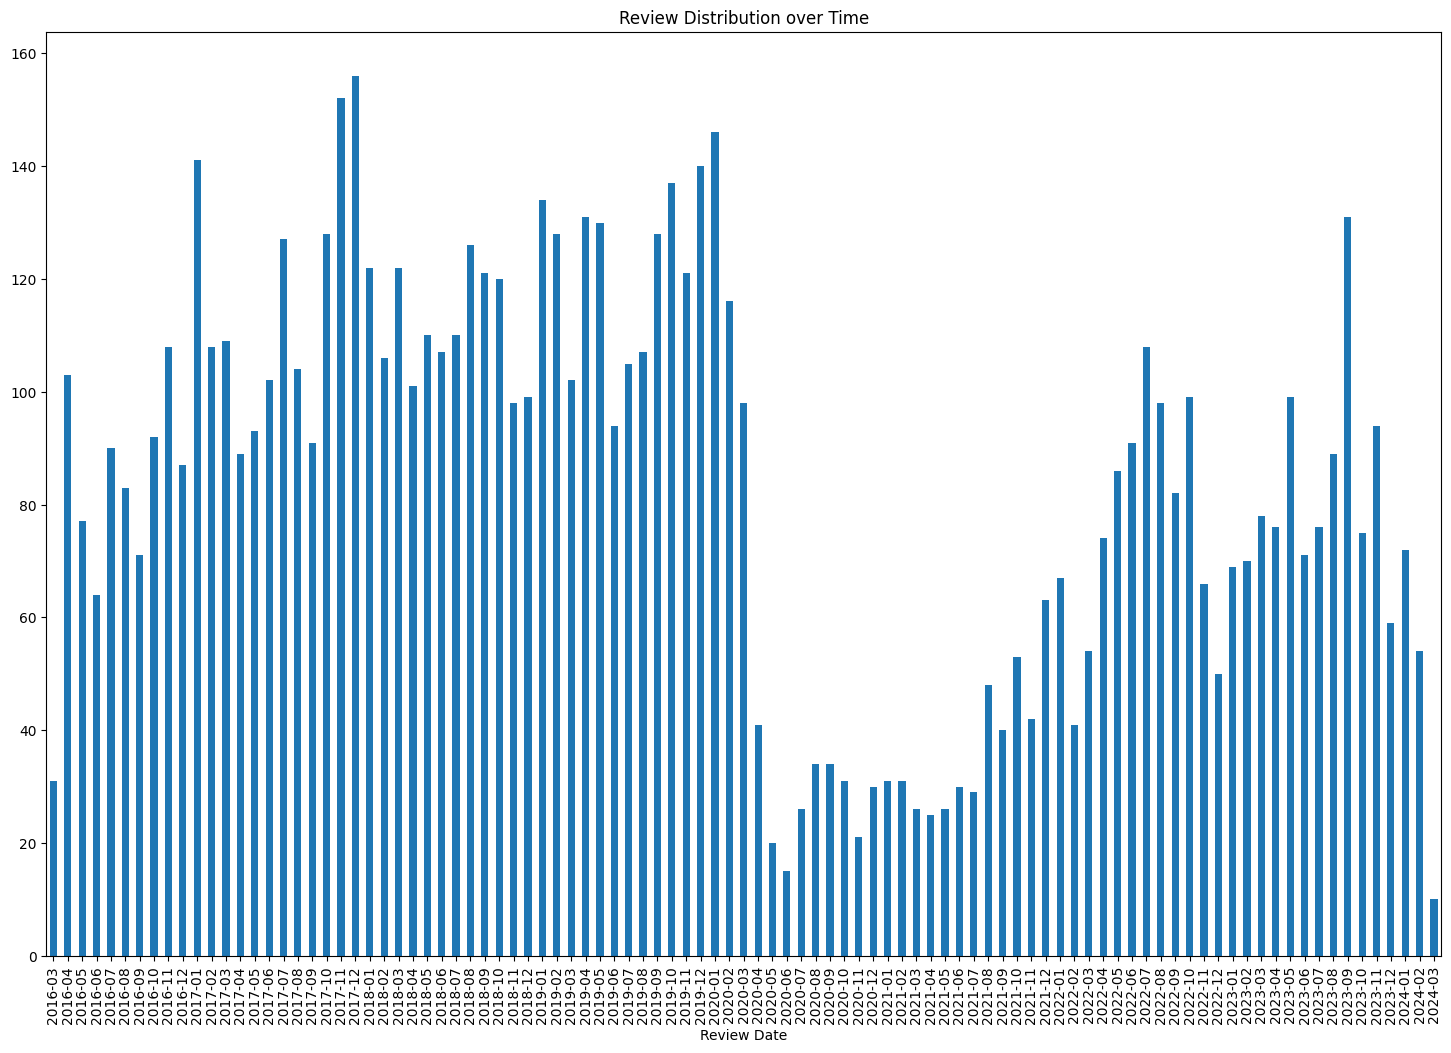

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

review_dist = df['Review Date'].dt.to_period('M').value_counts().sort_index()
review_dist.plot(kind='bar', figsize=(18,12), title='Review Distribution over Time')

### Distrbution of Class and Routes

<Axes: title={'center': 'Distribution of Travel Class'}, xlabel='Class'>

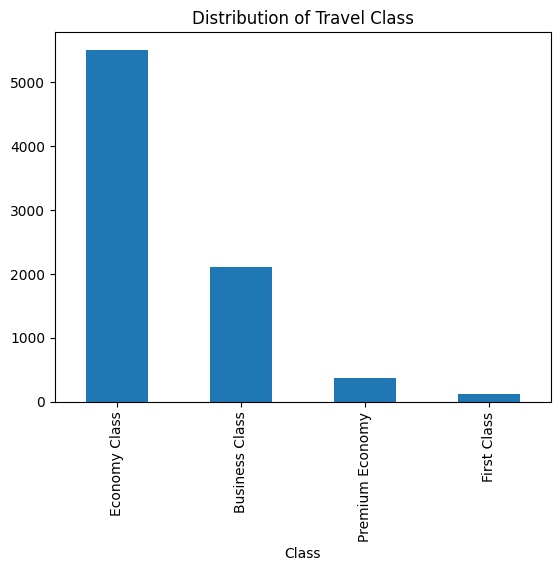

In [100]:
df['Class'].value_counts().plot(kind='bar', title='Distribution of Travel Class')

### Top 20 Routes by Review Count

<Axes: title={'center': 'Top 20 Routes by Review Count'}, ylabel='Route'>

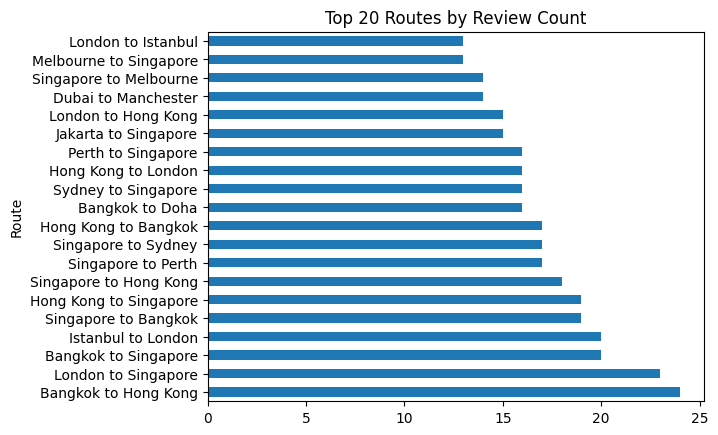

In [101]:
df['Route'].value_counts().head(20).plot(kind='barh', title='Top 20 Routes by Review Count')

### Review Frequency by Airline

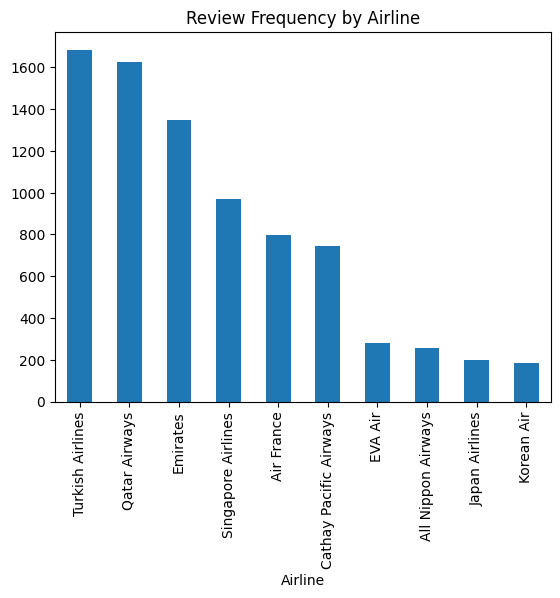

In [102]:
review_freq_by_airline = df['Airline'].value_counts().plot(kind='bar', title='Review Frequency by Airline')

### Month Flown - Seasonality trends

<Axes: title={'center': 'Seasonality: Reviews by Month Flown'}, xlabel='Month Name'>

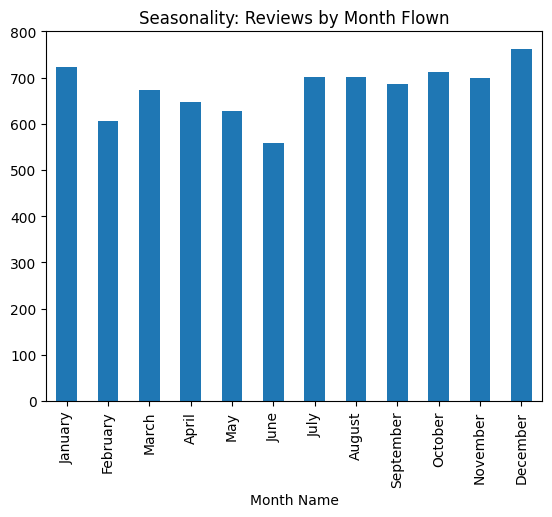

In [103]:
df['Month Name'] = df['Month Flown'].dt.strftime('%B')

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df['Month Name'] = pd.Categorical(df['Month Name'], categories=month_order, ordered=True)

df['Month Name'].value_counts().sort_index().plot(kind='bar', title='Seasonality: Reviews by Month Flown')

### Class Distribution

<Axes: title={'center': 'Class Distribution'}, ylabel='count'>

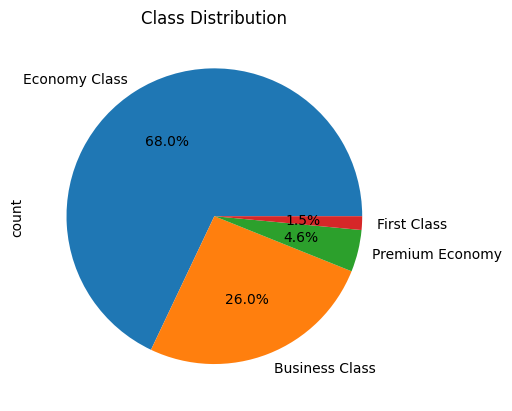

In [104]:
df['Class'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Class Distribution')

### Rating Histogram

<Axes: title={'center': 'Overall Rating Distrbution'}, ylabel='Frequency'>

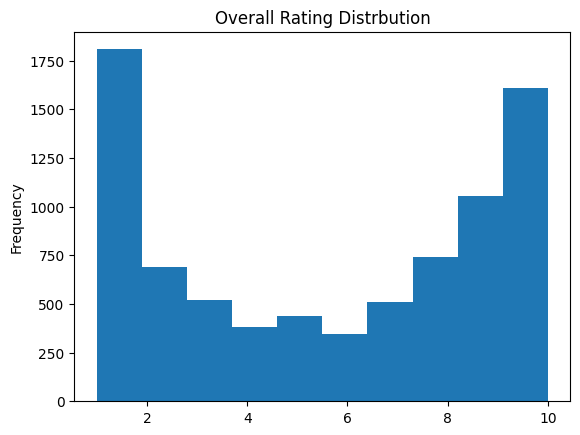

In [105]:
df['Overall Rating'].plot(kind='hist', bins=10, title='Overall Rating Distrbution')

### Average Rating by Airline

<Axes: title={'center': 'Average Rating per Airline'}, xlabel='Airline'>

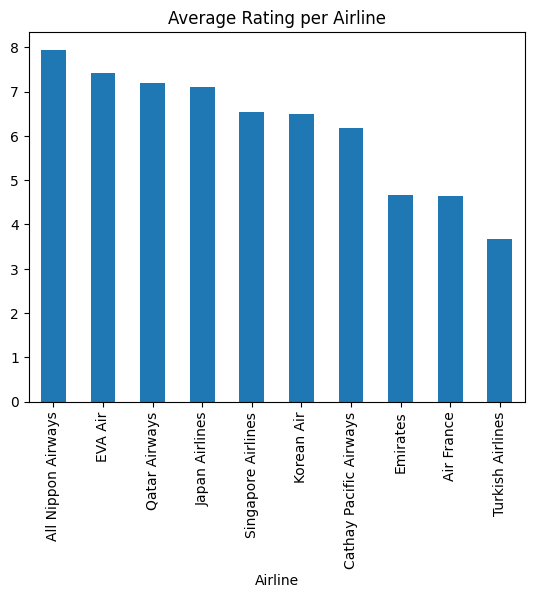

In [106]:
avg_rating_airline = df.groupby('Airline')['Overall Rating'].mean().sort_values(ascending=False)
avg_rating_airline.plot(kind='bar', title='Average Rating per Airline')

Text(0.5, 1.0, 'Class vs Overall Rating')

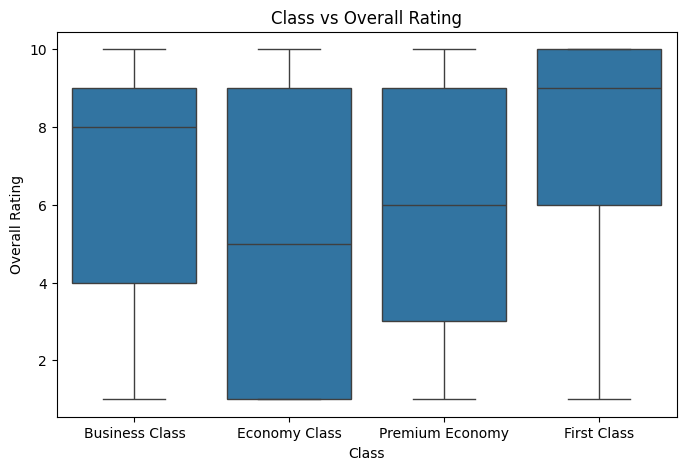

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='Class', y='Overall Rating', data=df)
plt.title('Class vs Overall Rating')


Text(0.5, 1.0, 'Traveller Type vs Rating')

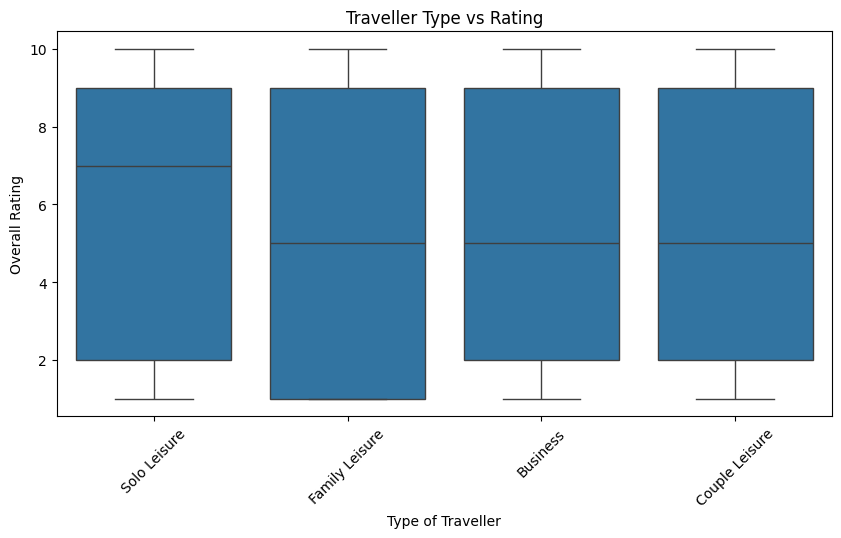

In [108]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Type of Traveller', y='Overall Rating', data=df)
plt.xticks(rotation=45)
plt.title('Traveller Type vs Rating')


<Axes: title={'center': 'Average Rating for Top 20 Routes'}, ylabel='Route'>

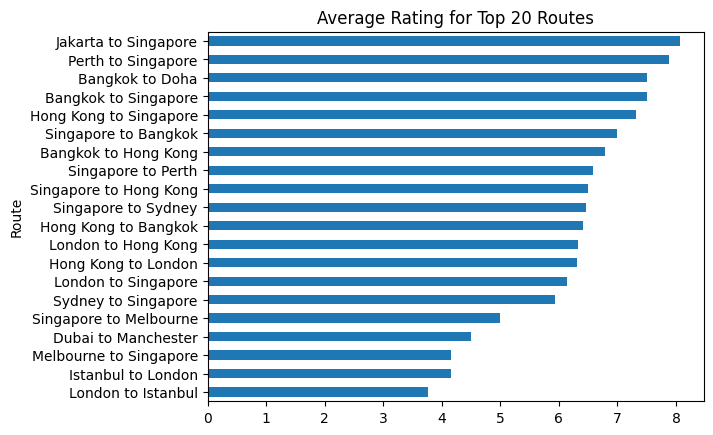

In [109]:
top_routes = df['Route'].value_counts().head(20).index
df_top_routes = df[df['Route'].isin(top_routes)]

avg_rating_route = df_top_routes.groupby('Route')['Overall Rating'].mean().sort_values()
avg_rating_route.plot(kind='barh', title='Average Rating for Top 20 Routes')
